<a href="https://colab.research.google.com/github/larissa-augusto/ProjetoHerois/blob/main/DesafioHeroes_Alelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clustering**




# **Questão 1**
Primeiro, queremos agrupar nossos super-heróis de acordo com seus poderes e informações. Execute um método de cluster não supervisionado usando o número de clusters que você julgar mais apropriado.


**1.	Qual algoritmo você escolheu e por quê?**

O algoritmo escolhido foi o método de clusterização  K-means. Esse método foi escolhido por ser um método não hierárquico e de simples aplicação. Ele também foi escolhido por ser um método com o qual tenho mais afinidade e conhecimento sobre seu funcionamento, por já ter utilizado essa técnica em uma pesquisa acadêmica. Por ter usado todos os atributos oferecidos, ou seja, a clusterização foi feita a partir de uma base com várias dimensões, também foi necessário reduzir a quantidade de dimensões antes da análise através da metodologia de PCA. O conjunto de dados foi reduzido para 2 dimensões.

**2. Quais recursos você usou e por quê? Explique qualquer pré-processamento ou engenharia de recursos (seleção) que você executou.**

Como etapa de pré-processamento as duas tabelas foram analisadas, identificando pontos de atenção e tratamento desses dados, através das funções:

data.info()
data.describe()
ProfileReport(data)

A função ProfileReport() nos traz uma informação muito completa, facilitando o trabalho manual da plotagem de tabelas a gráficos de síntese da informação, realizando diferentes diagnósticos para as variáveis quantitativas e qualitativas. Ele também nos dá informações como quais variáveis devem ser analisadas com mais cuidado, por terem muitas informações faltantes, ou por exemplo outliers.
Com essa diagnostico inicial foi necessário excluir linhas repetidas, em alguns casos excluir linhas com NaN e também transformações dos dados que estavam como string para dados categóricos numéricos. Como já citado anteriormente, para esse caso, houve também a redução de dimensões.


In [262]:
#Importar as bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
! pip install pandas==0.25
! pip install matplotlib==3.1.3
from pandas_profiling import ProfileReport
from sklearn.cluster import KMeans
import math as math

In [263]:
#carregar as tabelas que estão no github
heroes_information = pd.read_csv("https://raw.githubusercontent.com/larissa-augusto/ProjetoHerois/main/heroes_information.csv",delimiter=";" )
super_hero_powers = pd.read_csv("https://raw.githubusercontent.com/larissa-augusto/ProjetoHerois/main/super_hero_powers.csv")

#imprimir na tela as dimensões das tabelas
print(heroes_information.shape)
print(super_hero_powers.shape)

(734, 10)
(667, 168)


In [264]:
#analise descritiva da tabela heroes_information 
heroes_information.info()
heroes_information.describe()
ProfileReport(heroes_information)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 57.5+ KB


/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,10
Number of observations,734
Total Missing (%),0.2%
Total size in memory,57.5 KiB
Average record size in memory,80.2 B
Numeric,2
Categorical,8
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [267]:
#analise descritiva da tabela super_hero_powers
super_hero_powers.info()
super_hero_powers.describe()

#Rodar apenas se achar necessário, arquivo contem muita informação
#ProfileReport(super_hero_powers)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,...,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
count,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,...,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667,667
unique,667,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,Bird-Man II,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,425,489,656,642,620,410,541,590,455,637,646,548,562,659,642,554,509,360,648,575,659,520,651,612,652,378,663,660,661,666,418,659,627,609,645,657,660,595,578,...,655,659,663,661,647,660,661,645,647,660,666,648,665,664,644,633,633,645,664,656,661,652,665,648,665,661,665,659,644,644,653,651,665,658,666,666,666,665,665,665


In [268]:
#ANALISANDO PONTOS DE ATENÇÃO

#name has a high cardinality: 715 distinct values Warning = São os nomes do super-herois, então esta OK

#Dataset has 1 duplicate rows Warning = excluir linha duplicada
#heroes_information = heroes_information.drop_duplicates()

#Race has a high cardinality: 62 distinct values Warning = Também não é um problema, já que podem existem diversas raças
heroes_information.drop('Race', axis=1)

#Publisher has 15 / 2.0% missing values Missing = muitos dados faltantes, iremos excluir a coluna
heroes_information.drop('Publisher', axis=1)

#Valores irreais - transformando valores irreais e fora da escala de peso e altura em NaN
heroes_information['Weight'].replace(-99.0, np.nan, inplace=True)  
heroes_information['Height'].replace(-99.0, np.nan, inplace=True)

#Spatial Awareness is highly correlated with Hyperkinesis (ρ = 1) Rejected
#Omniscient is highly correlated with Omnipresent (ρ = 1) Rejected
# Essas variaveis aprensentaram correlação=1, o que pode impactar as analises futuras e até mesmo super estimá-las
# Portanto essa colunas serão excluidas.
#super_hero_powers = super_hero_powers.drop(['Spatial Awareness','Hyperkinesis', 'Omniscient', 'Omnipresent'], axis = 1 )

# União das tabelas em uma única tabela
heroes_information= heroes_information.rename(columns={'name': 'hero_names'})
complete_info = pd.merge(heroes_information, super_hero_powers, on='hero_names')

# transformando as variaveis categorias em string para variaveis categoricas númericas
complete_info = pd.get_dummies(complete_info, columns=['Gender', 'Eye color',
                                     'Hair color', 'Skin color','Alignment','Race','Publisher'],
                      drop_first=True)

#transformando a categoria True e False em 1 e 0
complete_info.replace(False, 0, inplace=True)
complete_info.replace(True, 1, inplace=True)

#Excluindo todos os NaN, porque o metodo não aceita
complete_info.dropna(inplace=True)


In [269]:
complete_info.head()


,hero_names,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,...,Race_New God,Race_Neyaphem,Race_Parademon,Race_Rodian,Race_Saiyan,Race_Spartoi,Race_Strontian,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie,Publisher_DC Comics,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Hanna-Barbera,Publisher_HarperCollins,Publisher_IDW Publishing,Publisher_Icon Comics,Publisher_Image Comics,Publisher_J. K. Rowling,Publisher_J. R. R. Tolkien,Publisher_Marvel Comics,Publisher_Microsoft,Publisher_NBC - Heroes,Publisher_Rebellion,Publisher_Shueisha,Publisher_Sony Pictures,Publisher_South Park,Publisher_Star Trek,Publisher_SyFy,Publisher_Team Epic TV,Publisher_Titan Books,Publisher_Universal Studios,Publisher_Wildstorm
0,A-Bomb,203.0,441.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,Abe Sapien,191.0,65.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Abin Sur,185.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Abomination,203.0,441.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Absorbing Man,193.0,122.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [270]:
#Separandos os dados da coluna de nome dos herois
df = complete_info.iloc[:, 1:]
superHeroes = complete_info.iloc[:, :1]
print(df.shape,superHeroes.shape)


(463, 324) (463, 1)


In [271]:
#Visualiando como os dados ficaram
df.head()

,Height,Weight,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,...,Race_New God,Race_Neyaphem,Race_Parademon,Race_Rodian,Race_Saiyan,Race_Spartoi,Race_Strontian,Race_Symbiote,Race_Talokite,Race_Tamaranean,Race_Ungaran,Race_Vampire,Race_Xenomorph XX121,Race_Yautja,Race_Yoda's species,Race_Zen-Whoberian,Race_Zombie,Publisher_DC Comics,Publisher_Dark Horse Comics,Publisher_George Lucas,Publisher_Hanna-Barbera,Publisher_HarperCollins,Publisher_IDW Publishing,Publisher_Icon Comics,Publisher_Image Comics,Publisher_J. K. Rowling,Publisher_J. R. R. Tolkien,Publisher_Marvel Comics,Publisher_Microsoft,Publisher_NBC - Heroes,Publisher_Rebellion,Publisher_Shueisha,Publisher_Sony Pictures,Publisher_South Park,Publisher_Star Trek,Publisher_SyFy,Publisher_Team Epic TV,Publisher_Titan Books,Publisher_Universal Studios,Publisher_Wildstorm
0,203.0,441.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,191.0,65.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,185.0,90.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,203.0,441.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,193.0,122.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [272]:

#Funções para prever o numero correto de cluster
def calculate_wcss(data):
        wcss = []
        for n in range(2, 21):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
    
        return wcss


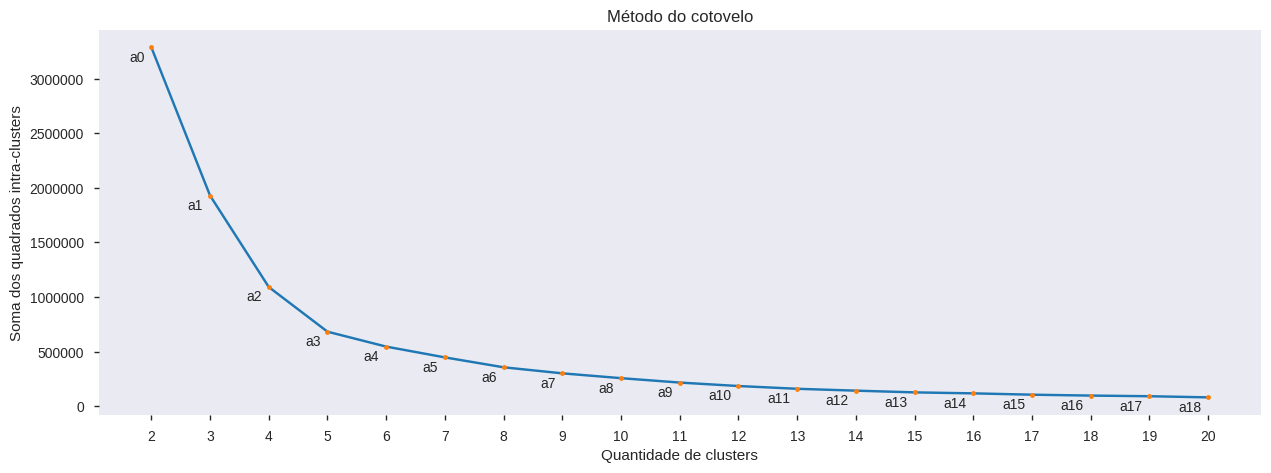

In [273]:

#Prevendo o número de cluster pelo metodo de elbow e seu grafico        
sum_of_squares = calculate_wcss(df)

#Plotando o grafico com a determinação do número de clusters -> 5 Clusters
x1, x2 = 2, 20
intervalo = range(x1,x2+1)

plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.xticks(intervalo)
plt.plot(intervalo, sum_of_squares) # pontos laranjas
plt.plot(intervalo, sum_of_squares, '.') # linha azul
for x,y in zip(intervalo,sum_of_squares): # colocando nome nos pontos
    label = "a{}".format(x-2)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(-5,-10),
                 ha='right')
plt.grid()
plt.show()

In [280]:
#Utilizando metodo de clusterização K-Means
# número de clusters definido pelo metodo do cotovelo
KModel = KMeans(n_clusters=5)
KModel.fit(df)
clusters = KModel.predict(df)
df['Cluster'] = clusters
KModel.inertia_

682376.5497431381

Text(0, 0.5, '')

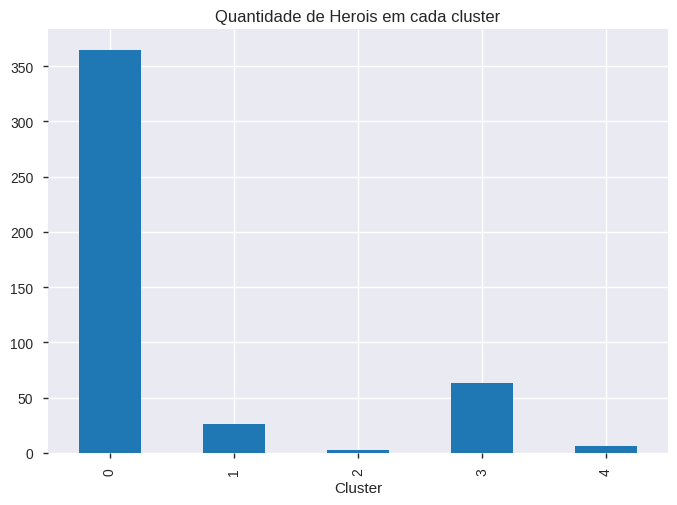

In [281]:
#Quantidade de Herois em cada cluster
plt.figure(0)
df.groupby('Cluster').size().plot(kind = 'bar')
plt.title('Quantidade de Herois em cada cluster')
plt.ylabel('')

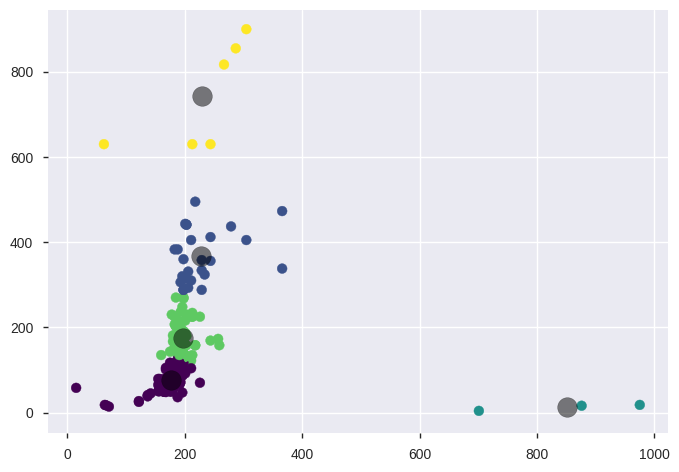

In [282]:
#Plot dos agrupamentos

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=clusters, s=50, cmap='viridis')

centers = KModel.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [286]:
#Diminuindo as dimensões dos dados através do metodo PCA
# Para 2 dimensões
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X2D = pca.fit_transform(df)
#X2D

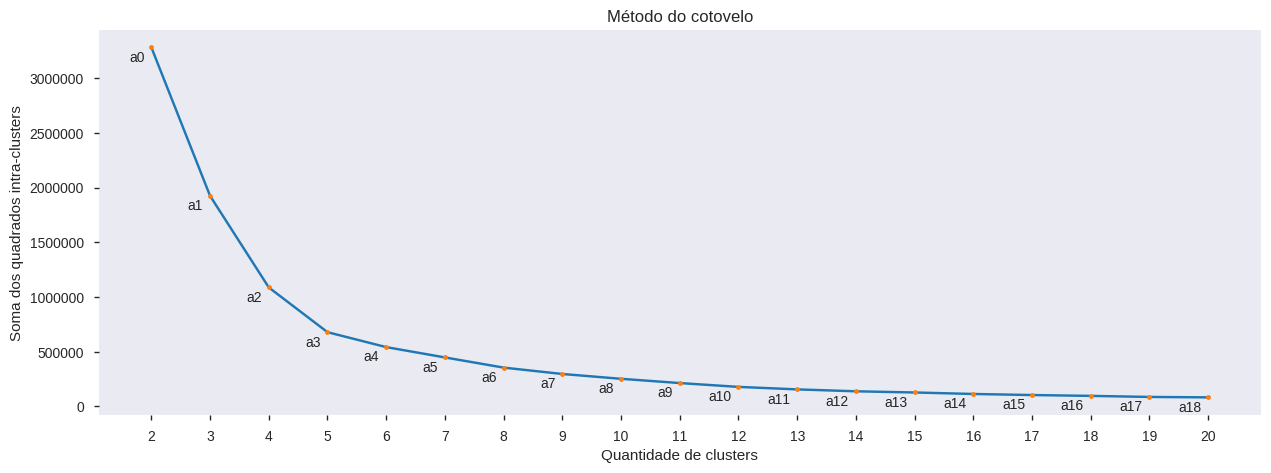

In [287]:
#verificando o número correto de clusters
#Prevendo o número de cluster pelo metodo de elbow e seu grafico        
sum_of_squares2 = calculate_wcss(X2D)

#Plotando o grafico com a determinação do número de clusters -> 5 Clusters
x1, x2 = 2, 20
intervalo = range(x1,x2+1)

plt.figure(figsize=(15,5))
plt.title('Método do cotovelo')
plt.xlabel('Quantidade de clusters')
plt.ylabel('Soma dos quadrados intra-clusters')
plt.xticks(intervalo)
plt.plot(intervalo, sum_of_squares2) # pontos laranjas
plt.plot(intervalo, sum_of_squares2, '.') # linha azul
for x,y in zip(intervalo,sum_of_squares2): # colocando nome nos pontos
    label = "a{}".format(x-2)
    plt.annotate(label,
                 (x,y),
                 textcoords="offset points",
                 xytext=(-5,-10),
                 ha='right')
plt.grid()
plt.show()

In [288]:
#Aplicando K-means
KModel2 = KMeans(n_clusters=5)
KModel2.fit(X2D)
clusters = KModel2.predict(X2D)
#X2D['Cluster'] = clusters
KModel2.inertia_

677342.4230879513

Text(0, 0.5, '')

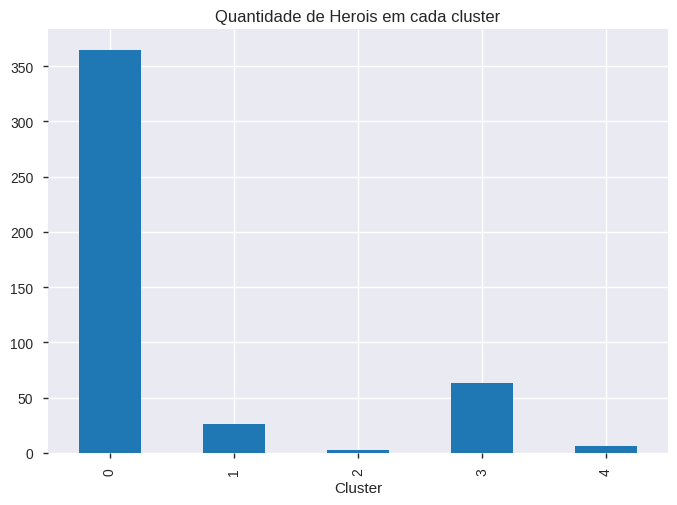

In [289]:
#Quantidade de Herois em cada cluster
plt.figure(0)
df.groupby('Cluster').size().plot(kind = 'bar')
plt.title('Quantidade de Herois em cada cluster')
plt.ylabel('')

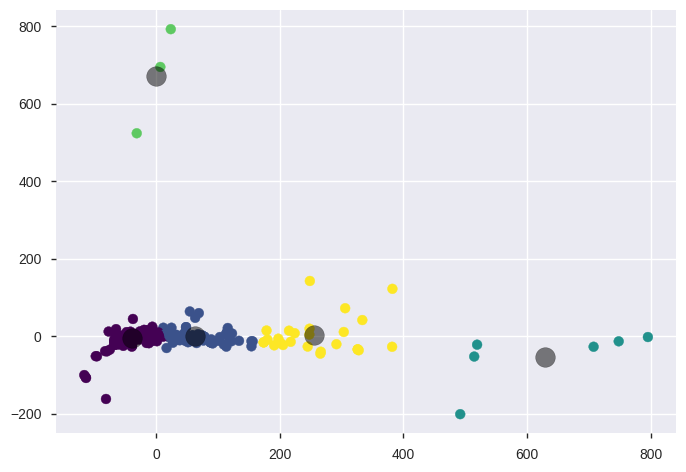

In [290]:
#Plot dos agrupamentos
plt.scatter(X2D[:, 0], X2D[:, 1], c=clusters, s=50, cmap='viridis')

centers = KModel2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# **Questão 2**


**Um dos desafios do clustering é definir o número certo de clusters. Como você escolheu esse número? Como você avalia a qualidade dos clusters finais?**

Para decidir o numero de clusters foi utilizado o método de elbow (Método do cotovelo). Primeiro é importante intendermos que o melhor numero de clusters a ser utilizado é aquele onde a soma dos quadrados das distancias intra-clusters, ou seja, a soma das distancias em relação ao centroide do cluster, é menor. Neste cenário temos cluster mais heterogêneos entre eles e clusters mais homogêneos internamente. O método do cotovelo utiliza desta logica para calcular o melhor número de clusters. Que nesta análise foi de 5 clusters (a3).
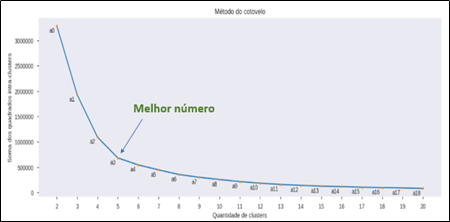


# **Identificando os bandidos**
Nesta seção, lidaremos com o problema de aprendizagem supervisionada. Mais concretamente, iremos formular uma tarefa de classificação, e nosso alvo é o alinhamento dos super-heróis (bom ou mau).





#**Questão 3**
Primeiro, usaremos o algoritmo Naive Bayes. Execute o algoritmo nos dados dos super-heróis para prever a variável de alinhamento e avaliar os resultados. Novamente, detalhe qualquer pré-processamento e engenharia de recursos que você aplicou no processo.


**1.	Quais hipóteses assumimos ao usar o algoritmo Naive Bayes?**

O algoritmo é baseado no Teorema de Bayes, ou seja, sobre a probabilidade de um evento acontecer. Neste caso a hipótese que assumimos é que os atributos/variáveis que estamos usando são independentes entre si, ou seja, o fato de um super herói possuir o super poder de controlar o fogo é independente da super força, ou então do fato dele possuir a cor vermelha. Sendo assim, a probabilidade de o herói ser mal ou bom são independentes entre si. Ele também assume que todos os atributos tem pesos iguais durante a classificação e o valor de um atributo não irá influenciar o outro.

**2.	Como as características específicas deste conjunto de dados influenciam suas escolhas e resultados de modelagem?**

Algumas características do conjunto de dados foram levadas em consideração durante a limpeza dos dados. Atributos redundantes podem interferir na acurácia do modelo, portanto os atributos 'Spatial Awareness','Hyperkinesis', 'Omniscient', 'Omnipresent' foram eliminados na análise. Valores ausentes devem ser excluídos para que a analise funcione, isso acabou acarretando na redução do conjunto de dados em quase 30%, contudo entendendo que esse processo é importante e permite o algoritmo trabalhar de maneira eficaz.
Alguns atributos podem não seguir a distribuição Gaussiana, isso não foi testada para Peso e altura, porém com certeza pode ter influenciado o resultado da modelagem.

**3. Como você avalia os resultados?**

O modelo teve um ajuste de 0,564, o que particularmente não vejo como um bom resultado. Acredito que houve uma má manipulação dos dados, o que pode ter acarretado em um baixo valor de ajuste.



In [355]:
#Carregando os dados novamente
heroes_information = pd.read_csv("https://raw.githubusercontent.com/larissa-augusto/ProjetoHerois/main/heroes_information.csv",delimiter=";" )
super_hero_powers = pd.read_csv("https://raw.githubusercontent.com/larissa-augusto/ProjetoHerois/main/super_hero_powers.csv")

In [356]:
#ANALISANDO PONTOS DE ATENÇÃO

#name has a high cardinality: 715 distinct values Warning = São os nomes do super-herois, então esta OK

#Dataset has 1 duplicate rows Warning = excluir linha duplicada
heroes_information = heroes_information.drop_duplicates()

#Race has a high cardinality: 62 distinct values Warning = Também não é um problema, já que podem existem diversas raças
#heroes_information.drop('Race', axis=1)

#Publisher has 15 / 2.0% missing values Missing = muitos dados faltantes, iremos excluir a coluna
heroes_information.drop('Publisher', axis=1)

#Valores irreais - transformando valores irreais e fora da escala de peso e altura em NaN
heroes_information['Weight'].replace(-99.0, np.nan, inplace=True)  
heroes_information['Height'].replace(-99.0, np.nan, inplace=True)

#Spatial Awareness is highly correlated with Hyperkinesis (ρ = 1) Rejected
#Omniscient is highly correlated with Omnipresent (ρ = 1) Rejected
# Essas variaveis aprensentaram correlação=1, o que pode impactar as analises futuras e até mesmo super estimá-las
# Portanto essa colunas serão excluidas.
super_hero_powers = super_hero_powers.drop(['Spatial Awareness','Hyperkinesis', 'Omniscient', 'Omnipresent'], axis = 1 )

# União das tabelas em uma única tabela
heroes_information= heroes_information.rename(columns={'name': 'hero_names'})
complete_info = pd.merge(heroes_information, super_hero_powers, on='hero_names')

#transformando a categoria True e False em 1 e 0
complete_info.replace(False, 0, inplace=True)
complete_info.replace(True, 1, inplace=True)

#Excluindo todos os NaN da nossa variavel resposta
complete_info["Alignment"]. replace("-", np.nan, inplace=True)
complete_info["Alignment"]. replace("", np.nan, inplace=True)
complete_info. dropna(subset = ["Alignment"], inplace=True)

#excluindo a categoria "Neutral"
complete_info = complete_info[complete_info['Alignment']!='neutral']

# transformando as variaveis categorias em string para variaveis categoricas númericas
complete_info = pd.get_dummies(complete_info, columns=['Gender', 'Eye color',
                                     'Hair color', 'Skin color','Race','Publisher'],
                      drop_first=True)


#Excluindo todos os NaN, porque o metodo não aceita
complete_info.dropna(inplace=True)



In [357]:
#separando a tabela em x = variaveis independentes e y = variavel dependente
y = complete_info['Alignment']
x = complete_info.drop('Alignment', axis=1).drop('hero_names', axis=1)


In [358]:
print(y.head())
print(x.head())

0    good
1    good
2    good
3     bad
5     bad
Name: Alignment, dtype: object
   Height  Weight  ...  Publisher_Universal Studios  Publisher_Wildstorm
0   203.0   441.0  ...                            0                    0
1   191.0    65.0  ...                            0                    0
2   185.0    90.0  ...                            0                    0
3   203.0   441.0  ...                            0                    0
5   193.0   122.0  ...                            0                    0

[5 rows x 311 columns]


In [359]:
#Bibliotecas que serão utilizadas
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

#separando os dados em dados de treinamento do modelo (70%) e dados para teste do modelo (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#aplicando o modelo
gnbModel = GaussianNB()
gnbModel.fit(x_train, y_train)

#testando o modelo
y_pred = gnbModel.predict(x_test)

#Verificando o resultado
print("Number of mislabeled points out of a total %d points : %d"
      % (x_test.shape[0], (y_test != y_pred).sum()))


#Acurácia do modelo
total = x_test.shape[0]
acertos = (y_test != y_pred).sum()
print("Acurácia:{0:.3f}".format(acertos/total),"\n")


Number of mislabeled points out of a total 133 points : 75
Acurácia:0.564 



[[32 18]
 [57 26]]
              precision    recall  f1-score   support

         bad       0.36      0.64      0.46        50
        good       0.59      0.31      0.41        83

    accuracy                           0.44       133
   macro avg       0.48      0.48      0.43       133
weighted avg       0.50      0.44      0.43       133



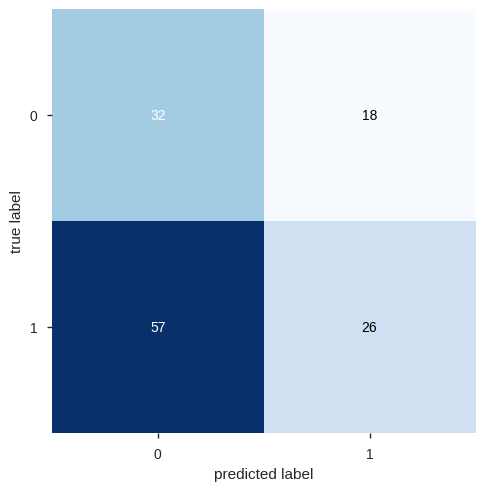

In [360]:
#Verificando a acurácia do modelo através da matriz de confusão
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

matriz_confusao = confusion_matrix(y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()


# **Questão 4**
Agora sinta-se à vontade para executar o algoritmo de classificação que julgar mais adequado para essa tarefa.


**1.	O que motivou sua escolha do algoritmo?**

Inicialmente foi utilizado o algoritmo DecisionTree, por ser um modelo capaz de agrupar e prever qual grupo cada individuo pertence através de n atributos. Contudo, posteriormente, com os resultados e também pensando um pouco mais na complexidade do problema e no grande número de atributos, foi realizado o método RandomForest, algoritmo que agrupa dentro de si vários modelos de DecisionTree, aumentando assim a capacidade do modelo realizar previsões mais assertivas. E foi o que aconteceu, a acurácia do modelo passou de 0,526 para 0,669.

**2. Como esse algoritmo se compara ao Naive Bayes em relação às suposições e resultados da modelagem?**

O algoritmo de Naive Bayes calcula a probabilidade que cada atributo tem para classificar o herói em bom ou mau, e depois realiza a multiplicação dessas probabilidades, descartando a interação que os atributos podem ter entre si para classificar o herói. Enquanto que o algoritmo de RandomForest considera essas interações, agrupando os heróis em bom ou mau considerando a correlação dos atributos oferecidos para o modelo. Desta forma e por conseguir identificar essas interações, o algoritmo RandomForest (0,669) foi um pouco melhor nas predições do que Naive Bayes (0,564).  Nos dois casos vemos que os modelos tem maior chance de acerto para prever quem são os mocinhos, com 0,59 e 0,75 chances de acerto, para o Naives Bayes e RandomForest, respectivamente. Enquanto que para prever os vilões a chance de acerto cai para 0,36 e 0,29. 



In [374]:
#Carregando os dados novamente
heroes_information = pd.read_csv("https://raw.githubusercontent.com/larissa-augusto/ProjetoHerois/main/heroes_information.csv",delimiter=";" )
super_hero_powers = pd.read_csv("https://raw.githubusercontent.com/larissa-augusto/ProjetoHerois/main/super_hero_powers.csv")


In [375]:
#ANALISANDO PONTOS DE ATENÇÃO

#name has a high cardinality: 715 distinct values Warning = São os nomes do super-herois, então esta OK

#Dataset has 1 duplicate rows Warning = excluir linha duplicada
heroes_information = heroes_information.drop_duplicates()

#Race has a high cardinality: 62 distinct values Warning = Também não é um problema, já que podem existem diversas raças
#heroes_information.drop('Race', axis=1)

#Publisher has 15 / 2.0% missing values Missing = muitos dados faltantes, iremos excluir a coluna
heroes_information.drop('Publisher', axis=1)

#Valores irreais - transformando valores irreais e fora da escala de peso e altura em NaN
heroes_information['Weight'].replace(-99.0, np.nan, inplace=True)  
heroes_information['Height'].replace(-99.0, np.nan, inplace=True)

#Spatial Awareness is highly correlated with Hyperkinesis (ρ = 1) Rejected
#Omniscient is highly correlated with Omnipresent (ρ = 1) Rejected
# Essas variaveis aprensentaram correlação=1, o que pode impactar as analises futuras e até mesmo super estimá-las
# Portanto essa colunas serão excluidas.
super_hero_powers = super_hero_powers.drop(['Spatial Awareness','Hyperkinesis', 'Omniscient', 'Omnipresent'], axis = 1 )

# União das tabelas em uma única tabela
heroes_information= heroes_information.rename(columns={'name': 'hero_names'})
complete_info = pd.merge(heroes_information, super_hero_powers, on='hero_names')

#transformando a categoria True e False em 1 e 0
complete_info.replace(False, 0, inplace=True)
complete_info.replace(True, 1, inplace=True)

#Excluindo todos os NaN da nossa variavel resposta
complete_info["Alignment"]. replace("-", np.nan, inplace=True)
complete_info["Alignment"]. replace("", np.nan, inplace=True)
complete_info. dropna(subset = ["Alignment"], inplace=True)

#excluindo a categoria "Neutral"
complete_info = complete_info[complete_info['Alignment']!='neutral']

# transformando as variaveis categorias em string para variaveis categoricas númericas
complete_info = pd.get_dummies(complete_info, columns=['Gender', 'Eye color',
                                     'Hair color', 'Skin color','Race','Publisher'],
                      drop_first=True)


#Excluindo todos os NaN, porque o metodo não aceita
complete_info.dropna(inplace=True)

In [376]:
y = complete_info['Alignment']
x = complete_info.drop('Alignment', axis=1).drop('hero_names', axis=1)

In [377]:
# Carregando as bibliotecas que serão necessárias
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics

#separando os dados em dados de treinamento do modelo (70%) e dados para teste do modelo (30%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

#Gerando o modelo de Arvores de decisão
dt = tree.DecisionTreeClassifier(criterion='gini')
dt = dt.fit(x_train, y_train)

#Testando o modelo
train_pred = dt.predict(x_train)
test_pred = dt.predict(x_test)

#Acurácia do modelo
print("Acurácia:{0:.3f}".format(metrics.accuracy_score(y_test, test_pred)),"\n")

Acurácia:0.556 



[[17 33]
 [26 57]]
              precision    recall  f1-score   support

         bad       0.40      0.34      0.37        50
        good       0.63      0.69      0.66        83

    accuracy                           0.56       133
   macro avg       0.51      0.51      0.51       133
weighted avg       0.54      0.56      0.55       133



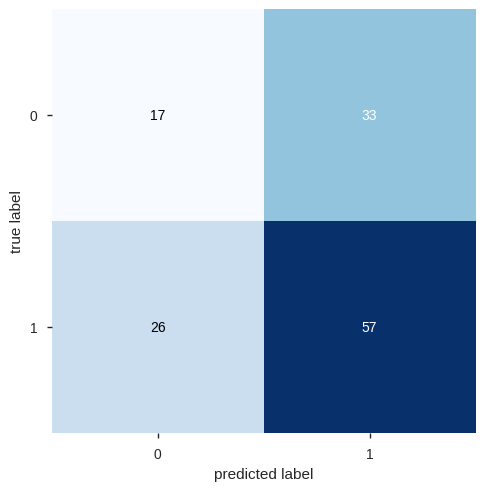

In [378]:
#Verificando a acurácia do modelo através da matriz de confusão

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,test_pred))
print(classification_report(y_test,test_pred))

matriz_confusao = confusion_matrix(y_test,test_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

In [379]:
# Carregando as bibliotecas que serão necessárias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Separando os dados em dados de treinamento do modelo (70%) e dados para teste do modelo (30%)
xTrain, xTest, yTrain, yTest = train_test_split(x, y,train_size = 0.70)

#Gerando o modelo de RandomFores - Floresta aleatória
rf = RandomForestClassifier()
rf = rf.fit(xTrain, yTrain)

#Testando o modelo
train_pred = rf.predict(xTrain)
test_pred = rf.predict(xTest)

#Acurácia do modelo
print("Acurácia:{0:.3f}".format(metrics.accuracy_score(yTest, test_pred)),"\n")

Acurácia:0.677 



[[ 7 36]
 [ 7 83]]
              precision    recall  f1-score   support

         bad       0.50      0.16      0.25        43
        good       0.70      0.92      0.79        90

    accuracy                           0.68       133
   macro avg       0.60      0.54      0.52       133
weighted avg       0.63      0.68      0.62       133



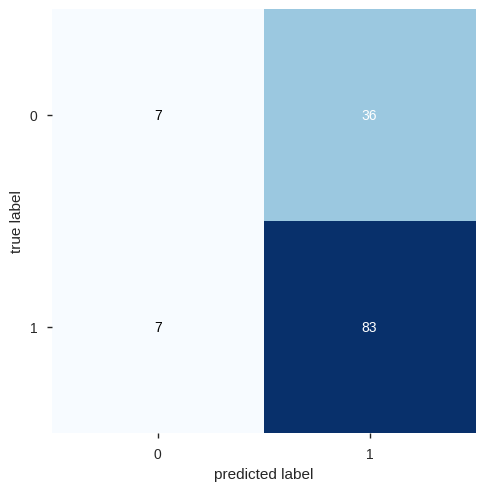

In [380]:
#Verificando a acurácia do modelo através da matriz de confusão

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(yTest, test_pred))
print(classification_report(yTest, test_pred))

matriz_confusao = confusion_matrix(yTest, test_pred)
fig, ax = plot_confusion_matrix(conf_mat = matriz_confusao)
plt.show()

## **Além do bem e do mal**

Vamos transformar nosso problema em uma tarefa de regressão e tentar prever o peso dos super-heróis dados os outros recursos.

In [381]:
heroes_information = pd.read_csv("https://raw.githubusercontent.com/larissa-augusto/ProjetoHerois/main/heroes_information.csv",delimiter=";" )
super_hero_powers = pd.read_csv("https://raw.githubusercontent.com/larissa-augusto/ProjetoHerois/main/super_hero_powers.csv")

In [382]:
#ANALISANDO PONTOS DE ATENÇÃO


#Dataset has 1 duplicate rows Warning = excluir linha duplicada
heroes_information = heroes_information.drop_duplicates()

#Valores irreais - transformando valores irreais e fora da escala de peso e altura em NaN
heroes_information['Weight'].replace(-99.0, np.nan, inplace=True)
heroes_information['Height'].replace(-99.0, np.nan, inplace=True)


# União das tabelas em uma única tabela
heroes_information= heroes_information.rename(columns={'name': 'hero_names'})
complete_info = pd.merge(heroes_information, super_hero_powers, on='hero_names')

#excluir os NaN na colunas que serão utilizadas no modelo
complete_info.dropna(subset = ["Height"], inplace=True)
complete_info.dropna(subset = ["Weight"], inplace=True)


In [383]:
#verificando correlação através de uma matriz de correlações
a = pd.get_dummies(complete_info, columns=['Gender', 'Eye color', 'Race',
                                     'Hair color','Publisher','Alignment' ,'Skin color'],drop_first=True)
a.replace(False, 0, inplace=True)
a.replace(True, 1, inplace=True)
a.drop('hero_names', axis=1)
corr_matrix = a.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
tri_df = corr_matrix.mask(mask)
corr_matrix
#corr_matrix[corr_matrix['Weight']>0.3]

KeyboardInterrupt: ignored

In [ ]:
#verificando qual a caracteristica da correlação entre peso e altura
plt.scatter(complete_info['Height'], complete_info['Weight'])
plt.grid()
plt.show()

In [ ]:
#limpando outliers
a = a.drop(a[a.Height > 350].index)
a = a.drop(a[a.Height < 0].index)
b = a.drop(a[a.Weight < 0].index)

#normalizando peso e altura através do LOG
b['HeightLOG'] = np.log2(b['Height'])
b['WeightLOG'] = np.log2(b['Weight'])

#retirando outros outliers que ficaram mais claros após a transformação dos dados
b = b.drop(b[b.HeightLOG < 6].index)
plt.scatter(b['HeightLOG'], b['WeightLOG'])
plt.grid()
plt.show()


In [ ]:
#Bibliotecas que serão utilizadas
import sklearn.model_selection as ms
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression


#transformando os valores de float para int.
c = round(b)

#separando a variavel resposta (Peso) e a variavel explicatica (altura)
x = b.iloc[:, 294].values
x = x.reshape(-1,1)
y = c.iloc[:, 295].values

#separando os dados em dados de treinamento do modelo (70%) e dados para teste do modelo (30%)
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size = 1/5, random_state = 0)
 
#aplicando a regressão logistica 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

#testanto  a equação gerada
y_pred = classifier.predict(X_test)
y_pred_prob = classifier.predict_proba(X_test)
y_pred_prob = y_pred_prob[:,1]
y_result_prob = np.concatenate((y_pred.reshape(len(y_pred),1), y_pred_prob.reshape(len(y_pred_prob),1)),1)

#mostrando a acurácia da equação gerada
print("Acurácia:{0:.3f}".format(accuracy_score(y_test, y_pred),"\n"))
print(classifier.coef_)


# **Análise**

**Quais aspectos desse conjunto de dados apresentam problemas para agrupamento, classificação e regressão? Como você resolveu esses problemas?**

Os aspectos problemáticos foram alguns dados faltantes, colunas com muitos missings, modelos que precisaram de transformação dos dados (não que isso seja um problema, temos ferramentas para lidar com isso). Acredito que o que me complicou um pouco foi a quantidade de atributos na planilha super_hero_powers, como eram muitos, acabei usando quase todos os atributos em todos os modelos (com exceção da regressão), o que provavelmente foi o motivo pelo qual os modelos não atingiram bons ajustes.


# **Bônus**
Se você gostou de brincar com o conjunto de dados de super-heróis, esta seção é para você mostrar quaisquer outros aspectos dos dados que não exploramos nas perguntas. Como uma seção de bônus, isso é totalmente opcional, mas adoraríamos ver os insights que você pode obter desses dados.


In [320]:
heroes_information = pd.read_csv("https://raw.githubusercontent.com/larissa-augusto/ProjetoHerois/main/heroes_information.csv",delimiter=";" )
super_hero_powers = pd.read_csv("https://raw.githubusercontent.com/larissa-augusto/ProjetoHerois/main/super_hero_powers.csv")

In [331]:
heroes_information.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


Text(0, 0.5, '')

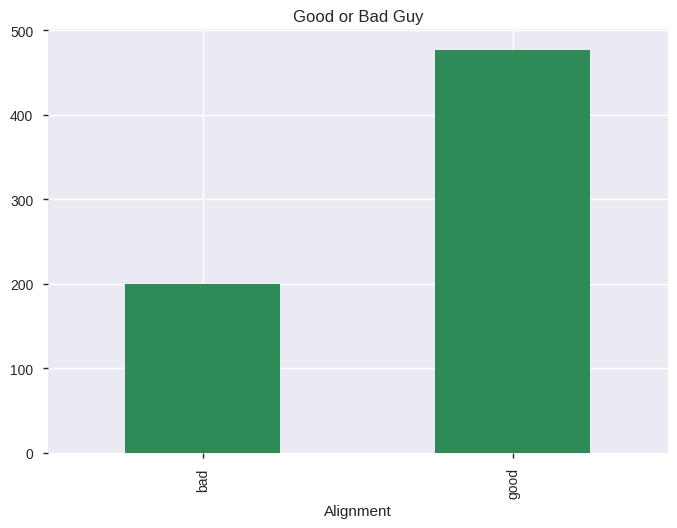

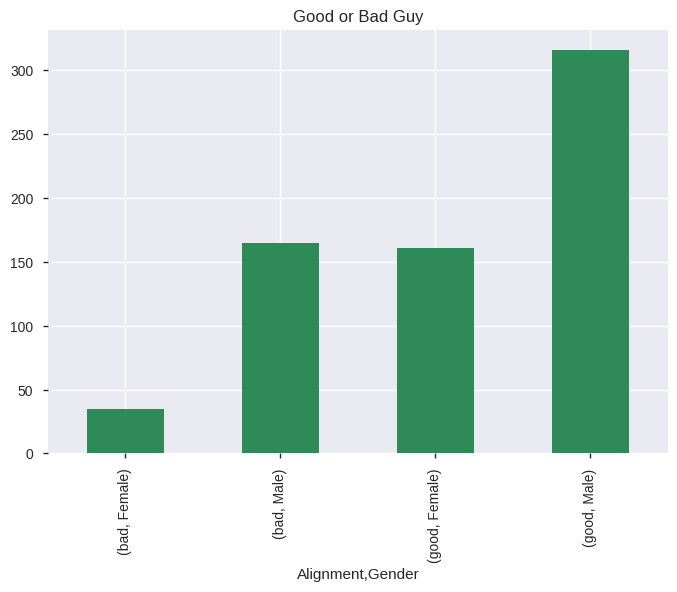

In [354]:
#Muito mais mocinhos do que bad guys
heroes_information = heroes_information[heroes_information['Alignment']!='neutral']
heroes_information = heroes_information[heroes_information['Alignment']!='-']
plt.figure(0)
heroes_information.groupby('Alignment').size().plot(kind='bar',color='seagreen')
plt.title('Good or Bad Guy')
plt.ylabel('')

plt.figure(1)
heroes_information.groupby(['Alignment','Gender']).size().plot(kind='bar',color='seagreen')
plt.title('Good or Bad Guy')
plt.ylabel('')

Text(0, 0.5, '')

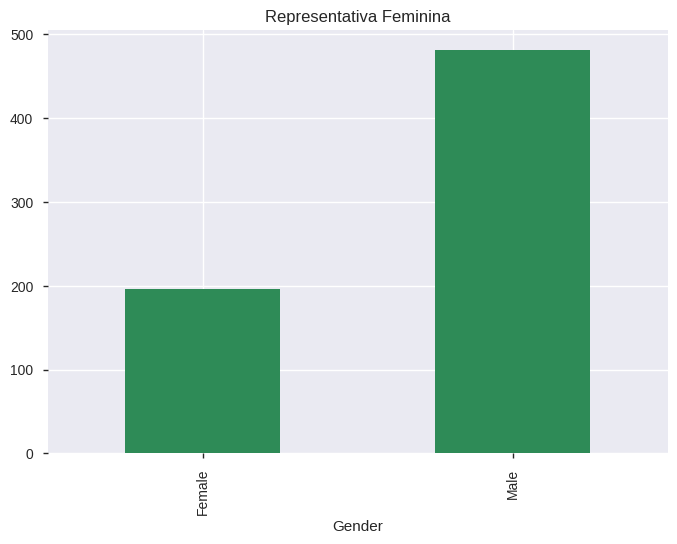

In [353]:
#Baixa Representividade Feminina
heroes_information = heroes_information[heroes_information['Gender']!='-']
plt.figure(0)
heroes_information.groupby(['Gender']).size().plot(kind='bar',color='seagreen')
plt.title('Representativa Feminina')
plt.ylabel('')

Text(0, 0.5, '')

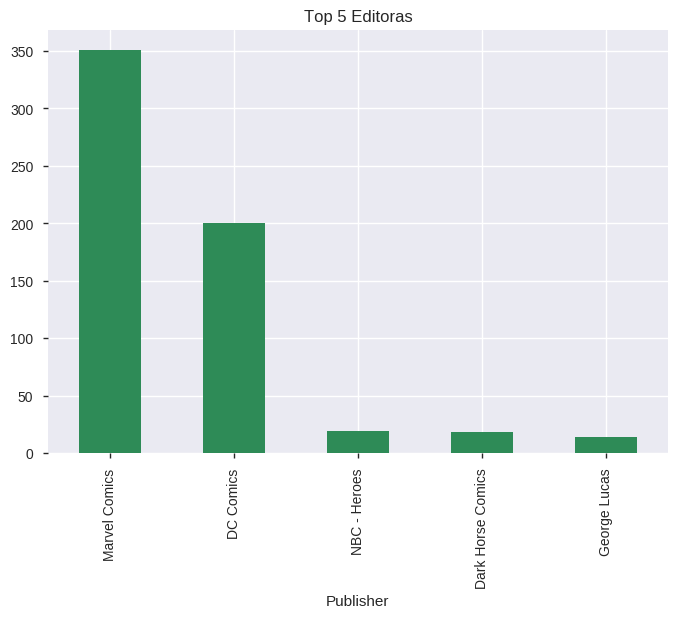

In [352]:
#Editoras
plt.figure(0)
heroes_information.groupby(['Publisher']).size().nlargest(5).plot(kind='bar',color='seagreen')
plt.title('Top 5 Editoras')
plt.ylabel('')